In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
from sklearn.metrics import pairwise_distances
import nbformat

import plotly.express as px

In [2]:
cd /home/gus/Documents/RCE/projects/2021-141_SdG_MBVB-Kusama/data/processed/RS

/home/gus/Documents/RCE/projects/2021-141_SdG_MBVB-Kusama/data/processed/RS


In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Groups - Summary table

In [5]:
dic_spec = {'1':'D','2':'B','3':'C','4':'D','5':'B','6':'C','7a':'A','7b':'A','7c':'A','8a':'A','8b':'A'}
files = sorted(glob('*txt*'))

groups = [pd.read_csv(file, index_col='parameter').loc['group']['value_mean'][-2:] for file in files]
patroons = [pd.read_csv(file, index_col='parameter').loc['comments']['value_mean'].split('_')[0][7:] for file in files]
colours = [pd.read_csv(file, index_col='parameter').loc['color']['value_mean'] for file in files]

df_groups = pd.DataFrame(data={'groups':groups, 'patroons':patroons, 'spectra':[dic_spec[patroon] for patroon in patroons], 'colour': colours}).set_index('groups')
df_groups.sort_values(by=['colour','spectra'])

,patroons,spectra,colour
groups,,,
02,7a,A,red
15,8b,A,red
16,8b,A,red
03,2,B,red
05,2,B,red
07,2,B,red
09,3,C,red
11,3,C,red
01,4,D,red


# Spectra 
## Plots

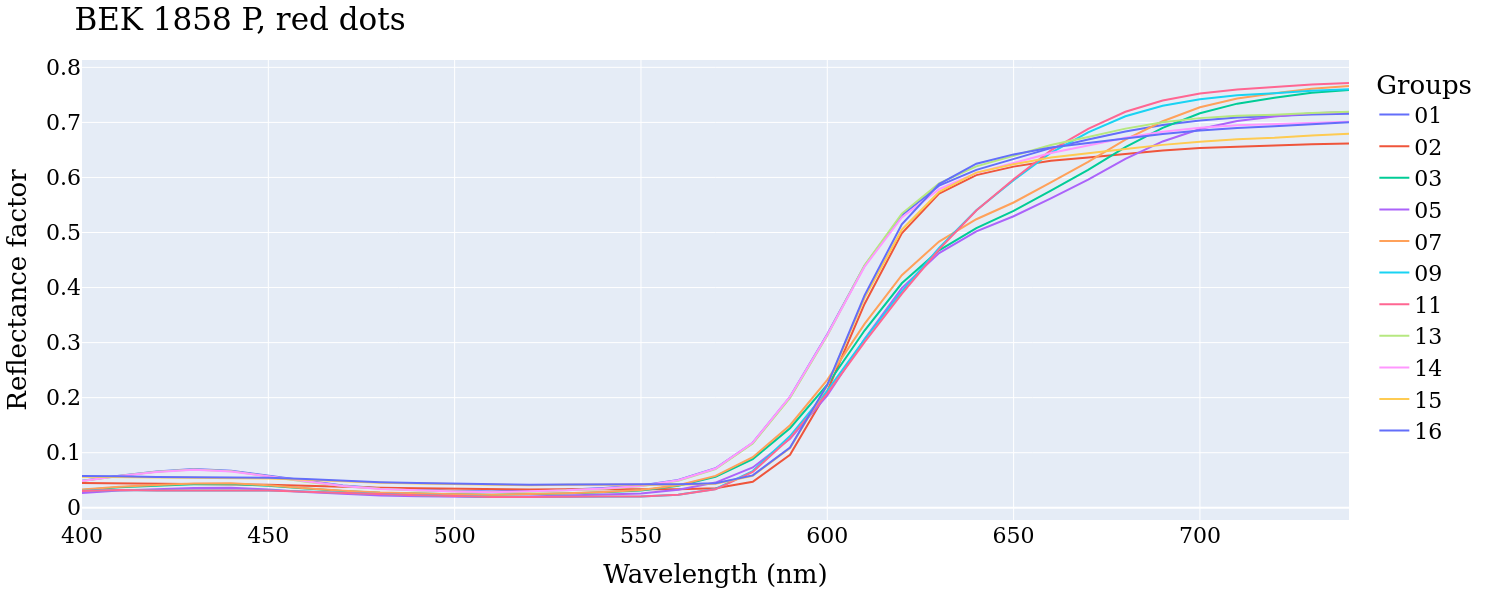

In [12]:
df_RS_reds = pd.DataFrame()

for file in files:
    df = pd.read_csv(file, index_col='parameter')
    color = df.loc['color']['value_mean']
    
    if color == 'red':
    
        group = df.loc['group']['value_mean'][-2:]
        patroon = df_groups.loc[group]['patroons']
        spectrum = df_groups.loc[group]['spectra']
        
        data_sp = df.loc['[MEASUREMENT DATA]':][6:].astype('float')

        wl = data_sp.index.astype('float')
        sp_mean = data_sp['value_mean']
        sp_std = data_sp['value_std']
        
        df_data = pd.DataFrame(data = {'groups':group,'spectra':spectrum, 'wl':wl.values, 'sp':sp_mean.values})
        df_RS_reds = pd.concat([df_RS_reds,df_data], axis=0)
        
        
fig = px.line(df_RS_reds, x ='wl',y='sp', color='groups') 

fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
    title="BEK 1858 P, red dots",
    xaxis_title="Wavelength (nm)",
    yaxis_title="Reflectance factor",
    legend_title="Groups",
    font=dict(
        family="Droid Serif",
        size=22,
        color="Black"
    )
)

fig.show()  

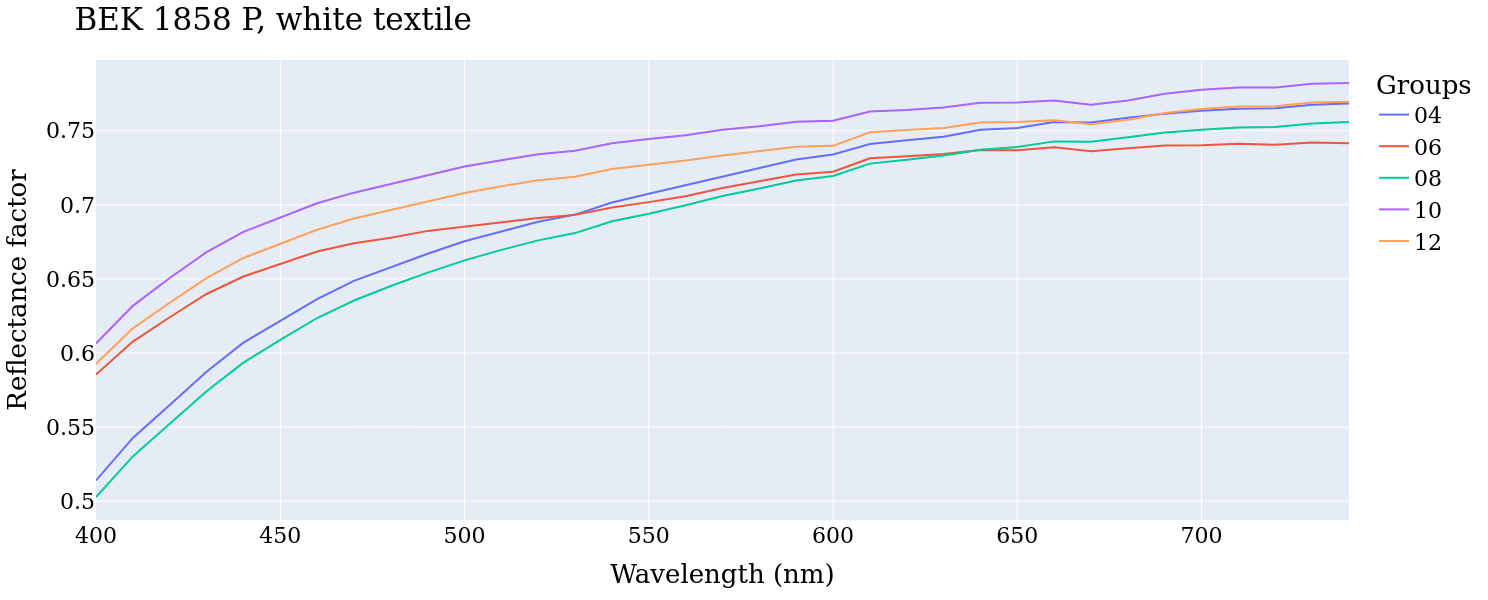

In [7]:
df_RS_whites = pd.DataFrame()

for file in files:
    df = pd.read_csv(file, index_col='parameter')
    color = df.loc['color']['value_mean']
    
    if color == 'white':
    
        group = df.loc['group']['value_mean'][-2:]
        patroon = df_groups.loc[group]['patroons']
        spectrum = df_groups.loc[group]['spectra']
        
        data_sp = df.loc['[MEASUREMENT DATA]':][6:].astype('float')

        wl = data_sp.index.astype('float')
        sp_mean = data_sp['value_mean']
        sp_std = data_sp['value_std']
        
        df_data = pd.DataFrame(data = {'groups':group,'spectra':spectrum, 'wl':wl.values, 'sp':sp_mean.values})
        df_RS_whites = pd.concat([df_RS_whites,df_data], axis=0)
        
        
fig = px.line(df_RS_whites, x ='wl',y='sp', color='groups') 

fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
    title="BEK 1858 P, white textile",
    xaxis_title="Wavelength (nm)",
    yaxis_title="Reflectance factor",
    legend_title="Groups",
    font=dict(
        family="Droid Serif",
        size=22,
        color="Black"
    )
)

fig.show() 

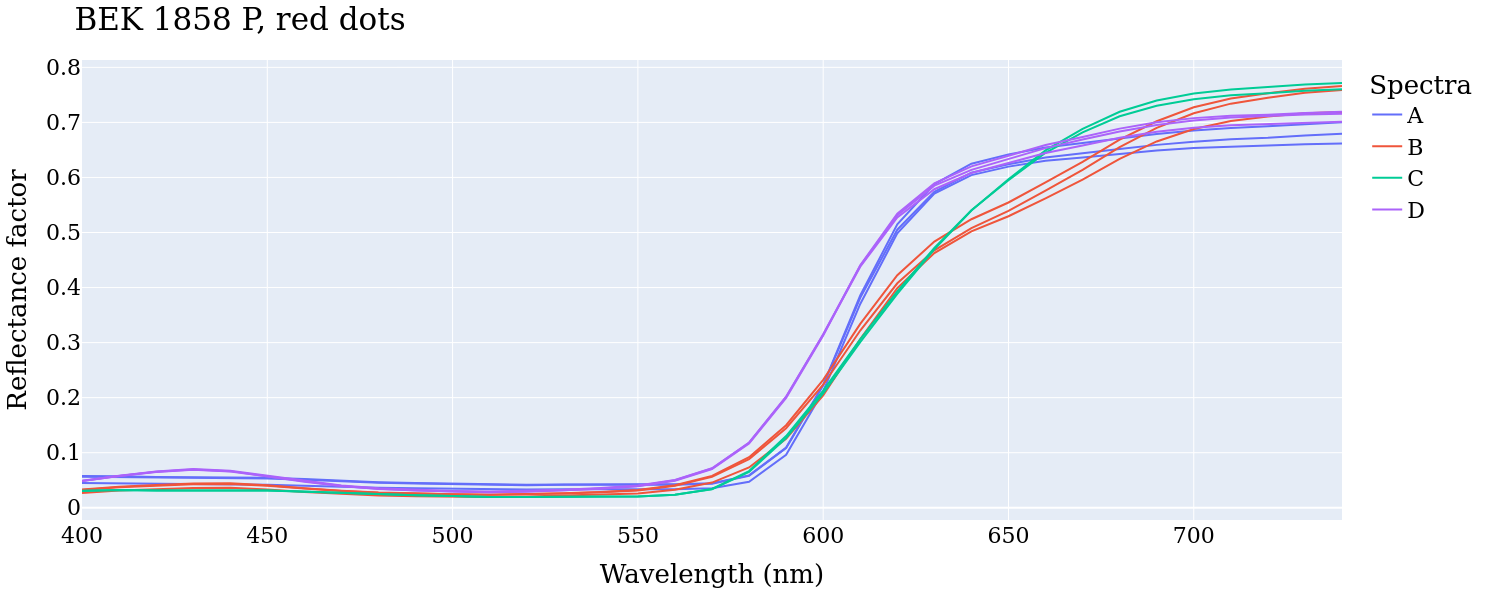

In [22]:
fig = px.line(df_RS_reds.sort_values(by=['spectra','groups','wl']), x ='wl',y='sp', line_group='groups', color='spectra') # 

fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
    title="BEK 1858 P, red dots",
    xaxis_title="Wavelength (nm)",
    yaxis_title="Reflectance factor",
    legend_title="Spectra",
    font=dict(
        family="Droid Serif",
        size=22,
        color="Black"
    )
)

fig.show()

## Pairwise distance 

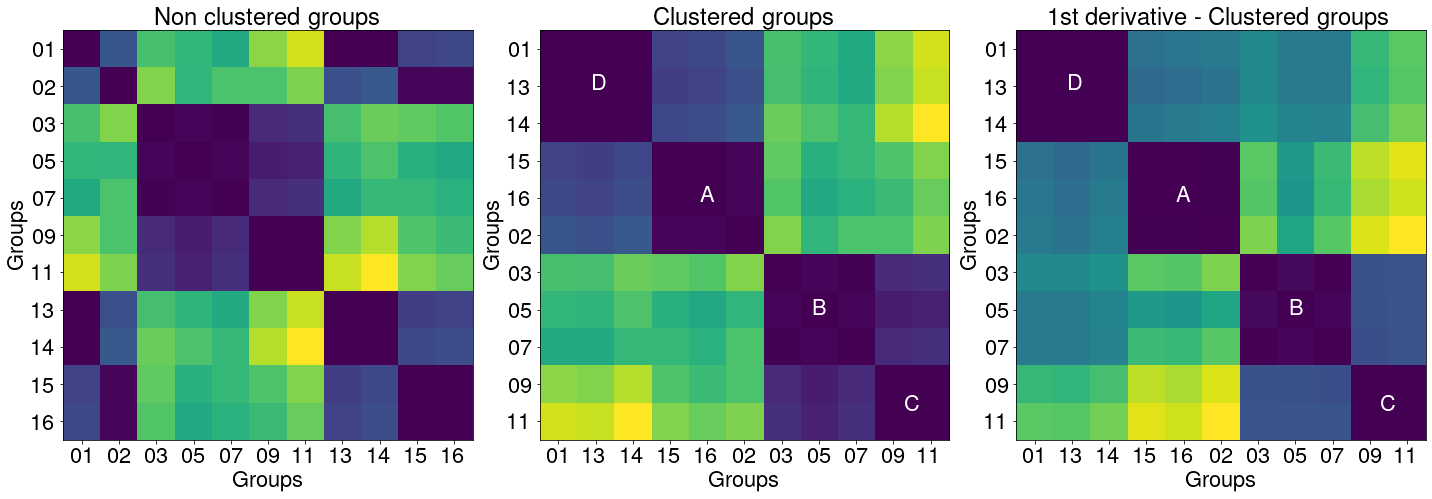

In [21]:
df_grps = pd.DataFrame(df_RS_reds.groups.unique())
spectra = (df_RS_reds.sp.values.reshape(11, -1))
spderiv = np.diff(spectra, axis = 1)

reordered_grps = [0,7, 8, 9, 10, 1, 2, 3, 4, 5, 6]
reordered_df = df_grps.iloc[reordered_grps,:]
reordered_sp = spectra[reordered_grps, :]
reordered_spderiv = spderiv[reordered_grps, :]

fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(20,10))
fs = 22

ax1.imshow(pairwise_distances(spectra, metric='cosine'))
ax2.imshow(pairwise_distances(reordered_sp, metric='cosine'))
ax3.imshow(pairwise_distances(reordered_spderiv, metric='cosine'))

ax1.set_xticks(np.arange(0,11))
ax1.set_xticklabels(df_grps.iloc[:,0].values, fontsize=fs)

ax1.set_yticks(np.arange(0,11))
ax1.set_yticklabels(df_grps.iloc[:,0].values, fontsize=fs)

ax1.set_xlabel('Groups', fontsize=fs)
ax1.set_ylabel('Groups', fontsize=fs)

ax1.set_title('Non clustered groups', fontsize=fs+2)



ax2.set_xticks(np.arange(0,11))
ax2.set_xticklabels(reordered_df.iloc[:,0].values, fontsize=fs)

ax2.set_yticks(np.arange(0,11))
ax2.set_yticklabels(reordered_df.iloc[:,0].values, fontsize=fs)

ax2.set_xlabel('Groups', fontsize=fs)
ax2.set_ylabel('Groups', fontsize=fs)

ax2.set_title('Clustered groups', fontsize=fs+2)


ax3.set_xticks(np.arange(0,11))
ax3.set_xticklabels(reordered_df.iloc[:,0].values, fontsize=fs)

ax3.set_yticks(np.arange(0,11))
ax3.set_yticklabels(reordered_df.iloc[:,0].values, fontsize=fs)

ax3.set_xlabel('Groups', fontsize=fs)
ax3.set_ylabel('Groups', fontsize=fs)

ax3.set_title('1st derivative - Clustered groups', fontsize=fs+2)


ax2.annotate('D', xy=(0.9,1.1), color='white', weight='bold', fontsize=fs)
ax2.annotate('B', xy=(6.85,7.15), color='white', weight='bold', fontsize=fs)
ax2.annotate('C', xy=(9.3,9.7), color='white', weight='bold', fontsize=fs)
ax2.annotate('A', xy=(3.8,4.1), color='white', weight='bold', fontsize=fs)

ax3.annotate('D', xy=(0.9,1.1), color='white', weight='bold', fontsize=fs)
ax3.annotate('B', xy=(6.85,7.15), color='white', weight='bold', fontsize=fs)
ax3.annotate('C', xy=(9.3,9.7), color='white', weight='bold', fontsize=fs)
ax3.annotate('A', xy=(3.8,4.1), color='white', weight='bold', fontsize=fs)

plt.tight_layout()
plt.show()

# Reproducibility - Group 1 

In [23]:
file_mean = sorted(glob('*group01*'))[0]
df_mean = pd.read_csv(file_mean, index_col='parameter')
Lab_mean = df_mean.loc[['L*','a*','b*']]['value_mean'].astype(float).values

project = '2021-141'
Ids =['BEK1859P-r01','BEK1859P-r02','BEK1859P-r03','BEK1859P-r04']

Lab_values = [class_interim.itm(Id, project).get_data(data='Lab',show_plot=False).loc[['L*','a*','b*']]['value1'].astype(float).values for Id in Ids]
dE00s = []

for i in range(len(Lab_values)):
    Lab = Lab_values[i]
    dE00 = colour.delta_E(Lab_mean,Lab)
    dE00s.append(dE00)
    
MCDM = np.round(np.mean(dE00s),2)

print(f'The mean colour difference to the mean (MCDM) has a value of {MCDM} dE00.')
print(' ')
print('This means that colour differences smaller the 0.33 cannot be interpretated as changes within materials.')

NameError: name 'class_interim' is not defined

# Repeatability - Group 2 

In [ ]:
file_mean = sorted(glob('*group02*'))[0]
df_mean = pd.read_csv(file_mean, index_col='parameter')
Lab_mean = df_mean.loc[['L*','a*','b*']]['value_mean'].astype(float).values

project = '2021-141'
Ids =['BEK1859P-r05','BEK1859P-r06','BEK1859P-r07','BEK1859P-r08']

Lab_values = [class_interim.itm(Id, project).get_data(data='Lab',show_plot=False).loc[['L*','a*','b*']]['value1'].astype(float).values for Id in Ids]
dE00s = []

for i in range(len(Lab_values)):
    Lab = Lab_values[i]
    dE00 = colour.delta_E(Lab_mean,Lab)
    dE00s.append(dE00)
    
MCDM = np.round(np.mean(dE00s),2)

print(f'The MCDM for the repeatability is {MCDM} dE00.')
print(' ')
print('This is a bit less interesting in our case. Reproducibility is more meaningful here.')

# Groups - CIELAB 

In [ ]:
df_RS

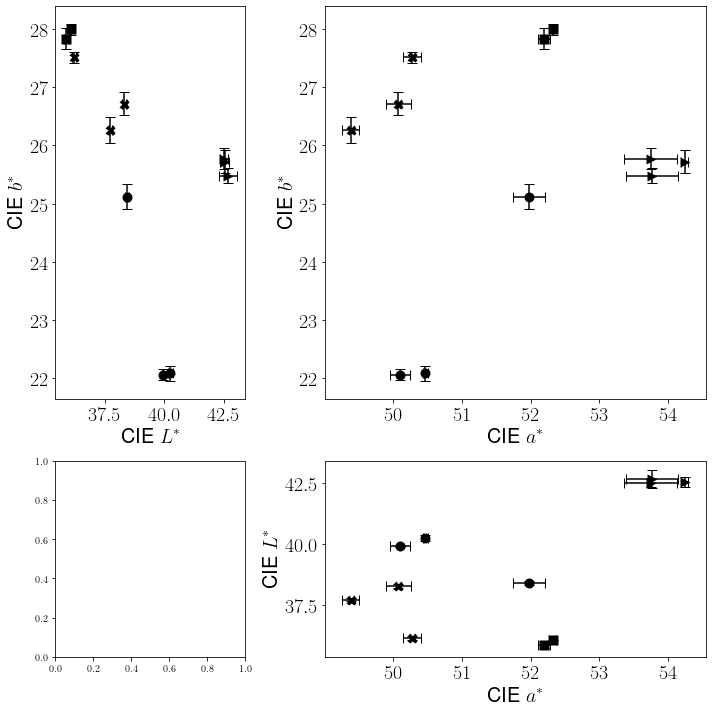

In [24]:
files = sorted(glob('*txt*'))
fmt = {'A':'o', 'B':'X', 'C':'s', 'D':'>'}


fig, ax = plt.subplots(2,2, figsize=(10, 10), gridspec_kw=dict(width_ratios=[1, 2], height_ratios=[2, 1]))

fs = 20
cps = 6     # capsize values
Lb = ax[0,0]
ab = ax[0,1]
AB = ax[1,0]
aL = ax[1,1]

df_Lab = pd.DataFrame()

for file in files:
    df = pd.read_csv(file, index_col='parameter')
    color = df.loc['color']['value_mean']
    
    if color == 'red':
    
        group = df.loc['group']['value_mean'][-2:]
        patroon = df_groups.loc[group]['patroons']
        spectrum = df_groups.loc[group]['spectra']        
               
        data_Lab = df.loc[['L*','a*','b*']].astype(float)
        
        L_mean = data_Lab.loc['L*']['value_mean']
        L_std = data_Lab.loc['L*']['value_std']
        
        a_mean = data_Lab.loc['a*']['value_mean']
        a_std = data_Lab.loc['a*']['value_std']
        
        b_mean = data_Lab.loc['b*']['value_mean']
        b_std = data_Lab.loc['b*']['value_std']
        
        df_data = pd.DataFrame(data = {'groups':group,'spectra':spectrum, 'wl':wl.values, 'L_mean':L_mean, 'a_mean':a_mean, 'b_mean':b_mean})
        df_Lab = pd.concat([df_Lab,df_data], axis=0)
        
        ab.errorbar(a_mean,b_mean, xerr=a_std, yerr=b_std,fmt=fmt[spectrum], capsize=5, ms=10, mec = 'none', mfc='k', ecolor='k')
        Lb.errorbar(L_mean,b_mean, xerr=L_std, yerr=b_std,fmt=fmt[spectrum], capsize=5, ms=10, mec = 'none', mfc='k', ecolor='k')
        aL.errorbar(a_mean,L_mean, xerr=a_std, yerr=L_std,fmt=fmt[spectrum], capsize=5, ms=10, mec = 'none', mfc='k', ecolor='k')
        


#ax.set_xlim(400,740)
ab.xaxis.set_tick_params(labelsize=fs)
ab.yaxis.set_tick_params(labelsize=fs)
Lb.xaxis.set_tick_params(labelsize=fs)
Lb.yaxis.set_tick_params(labelsize=fs)
aL.xaxis.set_tick_params(labelsize=fs)
aL.yaxis.set_tick_params(labelsize=fs)


Lb.set_xlabel("CIE $L^*$", fontsize=fs)
Lb.set_ylabel("CIE $b^*$", fontsize=fs)
ab.set_xlabel("CIE $a^*$", fontsize=fs)
ab.set_ylabel("CIE $b^*$", fontsize=fs)
aL.set_xlabel("CIE $a^*$", fontsize=fs)
aL.set_ylabel("CIE $L^*$", fontsize=fs) 


plt.tight_layout()
plt.show()

In [28]:
df_Lab

,groups,spectra,wl,L_mean,a_mean,b_mean
0,01,D,400.0,42.678,53.77,25.478
1,01,D,410.0,42.678,53.77,25.478
2,01,D,420.0,42.678,53.77,25.478
3,01,D,430.0,42.678,53.77,25.478
4,01,D,440.0,42.678,53.77,25.478
...,...,...,...,...,...,...
30,16,A,700.0,40.262,50.47,22.085
31,16,A,710.0,40.262,50.47,22.085
32,16,A,720.0,40.262,50.47,22.085
33,16,A,730.0,40.262,50.47,22.085
